In [1]:
# Required packages
import os
import time
import pandas as pd
from pymongo import MongoClient
from dotenv import load_dotenv

# MongoDB setup
MONGO_URI = "mongodb://localhost:27017/"
client = MongoClient(MONGO_URI)
db = client["my_virtualgenesis"]

# List available collections
collections = db.list_collection_names()
swap_collections = [col for col in collections if col.endswith("_swap")]

print(f"Found {len(swap_collections)} swap collections:")
for col in swap_collections:
    print(" -", col)


Found 13 swap collections:
 - afath_swap
 - ling_swap
 - maneki_swap
 - vgn_swap
 - arbus_swap
 - virgen_swap
 - lucien_swap
 - biz_swap
 - axr_swap
 - xllm2_swap
 - super_swap
 - roast_swap
 - jarvis_swap


In [2]:
# Load a collection from the list of swap collections
collection_name = swap_collections[0]  
print(f"Loading collection: {collection_name}")

# Load the collection into a DataFrame
cursor = db[collection_name].find()
df = pd.DataFrame(list(cursor))

# Display basic info
print(f"Loaded {len(df)} records from {collection_name}")
df.head()


Loading collection: afath_swap
Loaded 332 records from afath_swap


,_id,blockNumber,txHash,txLink,lp,maker,swapType,timestamp,timestampReadable,label,receiver,AFATH_IN,Virtual_OUT,Tax_1pct,AFATH_IN_BeforeTax,AFATH_IN_AfterTax,Virtual_IN,AFATH_OUT,AFATH_OUT_BeforeTax,AFATH_OUT_AfterTax
0,685148a90c55f49ccf5ac71d,31657361,0x4041b17be40a174da0e4654d1c72a473cfdab309fe8e...,https://basescan.org/tx/0x4041b17be40a174da0e4...,0xaA7516e6c7B0a31b9A831b8bD547075967e7B8c7,0x4dD41C74a4681A8f3119014c947c19238FA48144,sell,1750157481,2025-06-16 20:01:09,swap,0x4dD41C74a4681A8f3119014c947c19238FA48144,4.375370e+06,1430.619917,44195.657946,4.419566e+06,4.375370e+06,NaN,NaN,NaN,NaN
1,685148aa0c55f49ccf5ac728,31657364,0x0178f172393b39b0555768bf1fcf6238d296974f4073...,https://basescan.org/tx/0x0178f172393b39b05557...,0xaA7516e6c7B0a31b9A831b8bD547075967e7B8c7,0xDcaE6e569E6001c9033DCdd5aAe31d7B646e26d9,sell,1750157482,2025-06-16 20:01:15,swap,0xDcaE6e569E6001c9033DCdd5aAe31d7B646e26d9,4.952917e+06,1507.166005,50029.463760,5.002946e+06,4.952917e+06,NaN,NaN,NaN,NaN
2,685148ab0c55f49ccf5ac733,31657365,0xc9e0306fe988df08e8d92a058cb11454c73479598099...,https://basescan.org/tx/0xc9e0306fe988df08e8d9...,0xaA7516e6c7B0a31b9A831b8bD547075967e7B8c7,0xea4b4569d3D19306FE1A9F47b3923D57eaB55C7e,buy,1750157483,2025-06-16 20:01:17,swap,0xea4b4569d3D19306FE1A9F47b3923D57eaB55C7e,NaN,NaN,0.339161,NaN,NaN,0.01,33.916110,33.916110,33.576949
3,685148ac0c55f49ccf5ac73e,31657365,0x072f8e15a5fd6b9935a4db71698f8d29bc85177e8931...,https://basescan.org/tx/0x072f8e15a5fd6b9935a4...,0xaA7516e6c7B0a31b9A831b8bD547075967e7B8c7,0xea4b4569d3D19306FE1A9F47b3923D57eaB55C7e,buy,1750157484,2025-06-16 20:01:17,swap,0xea4b4569d3D19306FE1A9F47b3923D57eaB55C7e,NaN,NaN,0.339161,NaN,NaN,0.01,33.916093,33.916093,33.576932
4,685148ae0c55f49ccf5ac74b,31657367,0x3391371d31ed4c79499249a787b952fa7750fcb57d8e...,https://basescan.org/tx/0x3391371d31ed4c794992...,0xaA7516e6c7B0a31b9A831b8bD547075967e7B8c7,0xaA1093FcD4E29015AD17755c843c3d61A4548424,sell,1750157486,2025-06-16 20:01:21,swap,0xaA1093FcD4E29015AD17755c843c3d61A4548424,4.952917e+06,1400.125410,50029.462500,5.002946e+06,4.952917e+06,NaN,NaN,NaN,NaN


In [3]:
token_collections = [
    "xllm2_swap",
    "afath_swap",
    "biz_swap",
    "super_swap",   
    "ling_swap",
    "jarvis_swap",
    "lucien_swap",
    "vgn_swap",
    "maneki_swap",
    "arbus_swap",
    "axr_swap",
    "roast_swap",
    "virgen_swap"
]

# --- Combine all token swaps into one DataFrame ---
df_list = []

for col_name in token_collections:
    collection = db[col_name]
    data = list(collection.find({"swapType": {"$in": ["buy", "sell"]}}))
    if data:
        df_temp = pd.DataFrame(data)
        df_temp["token"] = col_name.replace("_swap", "")  # Optional: add token label
        df_list.append(df_temp)

# Combine all into one DataFrame
df = pd.concat(df_list, ignore_index=True)

In [4]:
required_cols = {"maker", "timestampReadable", "swapType"}
if not required_cols.issubset(df.columns):
    raise ValueError(f"Missing one of required columns: {required_cols}")

# Filter and sort relevant transactions
df_filtered = df[df["swapType"].isin(["buy", "sell"])].copy()
df_filtered = df_filtered.sort_values(by=["maker", "timestampReadable"])

# --- Matching Logic ---
# For each maker, track unmatched 'sell' transactions and try to pair them with 'buy'
buckets = {}
matched_count = 0

for maker, group in df_filtered.groupby("maker"):
    group = group.sort_values("timestampReadable")
    unmatched_sells = 0

    for _, row in group.iterrows():
        if row["swapType"] == "sell":
            unmatched_sells += 1
        elif row["swapType"] == "buy" and unmatched_sells > 0:
            # Match this buy with a previous sell
            matched_count += 1
            unmatched_sells -= 1

    buckets[maker] = matched_count  # or use unmatched_sells if you're tracking those

# Total counts
total_buys = len(df_filtered[df_filtered["swapType"] == "buy"])
total_sells = len(df_filtered[df_filtered["swapType"] == "sell"])
total_matched = matched_count

# Print summary
print(f"Total buy transactions: {total_buys}")
print(f"Total sell transactions: {total_sells}")
print(f"Matched sell-to-buy pairs: {total_matched}")
print(f"Unmatched sell transactions: {total_sells - total_matched}")


Total buy transactions: 17972
Total sell transactions: 16831
Matched sell-to-buy pairs: 4694
Unmatched sell transactions: 12137


In [5]:
# --- Time Difference Analysis ---
required_cols = {"maker", "timestamp", "swapType"}
if not required_cols.issubset(df.columns):
    raise ValueError(f"Missing one of required columns: {required_cols}")

# Filter only 'buy' and 'sell' swaps and sort them
df_filtered = df[df["swapType"].isin(["buy", "sell"])].copy()
df_filtered = df_filtered.sort_values(by=["maker", "timestamp"])

matched_diffs = []

# Group by maker address
for maker, group in df_filtered.groupby("maker"):
    group = group.sort_values("timestamp")
    buys = group[group["swapType"] == "buy"].to_dict("records")
    sells = group[group["swapType"] == "sell"].to_dict("records")

    used_buy_indices = set()

    for sell in sells:
        sell_ts = sell["timestamp"]
        for i, buy in enumerate(buys):
            if i in used_buy_indices:
                continue
            buy_ts = buy["timestamp"]
            if buy_ts < sell_ts:
                time_diff = sell_ts - buy_ts
                matched_diffs.append(time_diff)
                used_buy_indices.add(i)
                break

# --- Bucketize time differences ---
buckets = {
    "<=10s": 0,
    "11–30s": 0,
    "31–60s": 0,
    "61–300s": 0,
    ">300s": 0
}

for diff in matched_diffs:
    if diff <= 10:
        buckets["<=10s"] += 1
    elif diff <= 30:
        buckets["11–30s"] += 1
    elif diff <= 60:
        buckets["31–60s"] += 1
    elif diff <= 300:
        buckets["61–300s"] += 1
    else:
        buckets[">300s"] += 1

# --- Display final result ---
timing_df = pd.DataFrame(list(buckets.items()), columns=["Time Bucket", "Count"])
timing_df

,Time Bucket,Count
0,<=10s,477
1,11–30s,288
2,31–60s,293
3,61–300s,1261
4,>300s,4013


Top 5 Peak Hours for Swaps:
    hour  transaction_count
13    13               7948
16    16               4615
11    11               4161
14    14               2801
15    15               2477


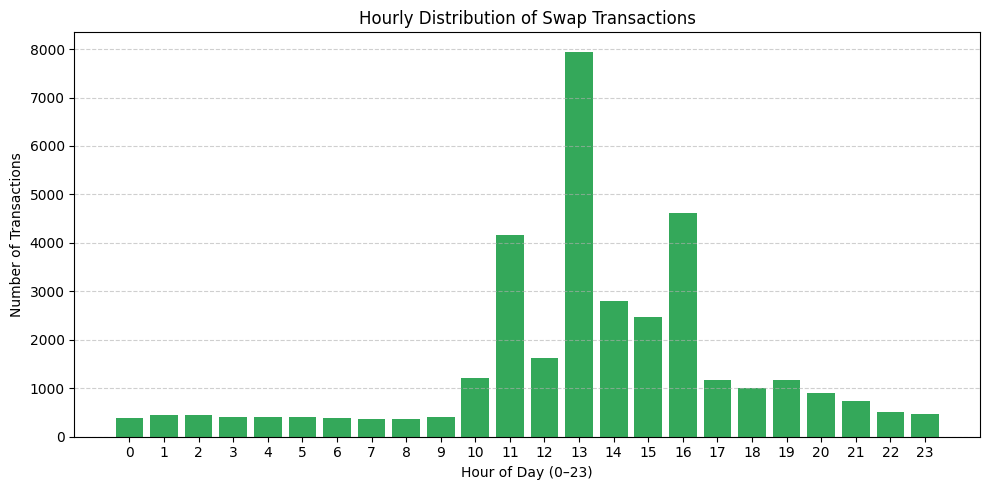

In [6]:
# Convert timestampReadable (string) to proper datetime object
df["timestamp_dt"] = pd.to_datetime(df["timestampReadable"])

# Extract hour of the day
df["hour"] = df["timestamp_dt"].dt.hour

# Group by hour and count number of transactions
hourly_counts = df.groupby("hour").size().reset_index(name="transaction_count")

# Sort and display top peak hours
peak_hours = hourly_counts.sort_values(by="transaction_count", ascending=False)
print("Top 5 Peak Hours for Swaps:")
print(peak_hours.head())

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(hourly_counts["hour"], hourly_counts["transaction_count"], color="#34A85A")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Transactions")
plt.title("Hourly Distribution of Swap Transactions")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [7]:
# Ensure columns exist
required_cols = {"maker", "swapType", "JARVIS_OUT_AfterTax", "JARVIS_IN"}
if not required_cols.issubset(df.columns):
    raise ValueError("Missing required columns in dataframe.")

# Step 1: Calculate total buy volume per wallet
buy_volume = (
    df[df["swapType"] == "buy"]
    .groupby("maker")["JARVIS_OUT_AfterTax"]
    .sum()
    .rename("buy_volume")
)

# Step 2: Calculate total sell volume per wallet
sell_volume = (
    df[df["swapType"] == "sell"]
    .groupby("maker")["JARVIS_IN"]
    .sum()
    .rename("sell_volume")
)

# Step 3: Combine both into a single DataFrame
volume_df = pd.concat([buy_volume, sell_volume], axis=1).fillna(0)

# Step 4: Calculate total volume
volume_df["total_volume"] = volume_df["buy_volume"] + volume_df["sell_volume"]

# Step 5: Get top 10 traders by total volume
top_traders = volume_df.sort_values("total_volume", ascending=False).head(10).reset_index()

top_traders


,maker,buy_volume,sell_volume,total_volume
0,0x6acA0AEFA3CF63a67282a26B8E3Db08e03c9483C,1.529267e+07,0.000000e+00,1.529267e+07
1,0x7babf08bB0BFF4A8513820Dd70E56b33539BD247,0.000000e+00,1.513975e+07,1.513975e+07
2,0x39fF592b719A3fA562c91f6b6141C7FD336628de,5.858814e+06,5.800226e+06,1.165904e+07
3,0x9621B895f62470C8dC953F293c3Fe87A64152219,4.951925e+06,4.363375e+06,9.315300e+06
4,0x62a33FB0cA9Ac5c78718f745feFF25baC0A3715A,5.191908e+06,3.854991e+06,9.046899e+06
5,0x8F761F127ae9daa245b4203C9Cc2CC5285fE25A8,5.229602e+06,3.614872e+06,8.844474e+06
6,0xb1bD6CDfC59D6a7d89E8bCC01Dc52a11170B2CbC,3.858202e+06,3.819620e+06,7.677821e+06
7,0x5BA4a1B24C3fFF3a52AD19b0253e7f756C0e1a0c,3.794994e+06,3.756654e+06,7.551648e+06
8,0xAa0A5b1E9318Aa94bfe3cA1506277B5B3E04AA7B,3.561163e+06,3.525551e+06,7.086713e+06
9,0x483438a3397246FDC32730b7F8F7eDcA88E78a8C,3.441833e+06,3.407415e+06,6.849249e+06


In [8]:
# Define bins for size ranges (you can adjust these)
bins = [0, 100, 1_000, 10_000, 50_000, 100_000, 500_000, 1_000_000, float("inf")]
labels = ["0–100", "100–1K", "1K–10K", "10K–50K", "50K–100K", "100K–500K", "500K–1M", ">1M"]

# Process buy trades
buy_bins = pd.cut(
    df[df["swapType"] == "buy"]["JARVIS_OUT_AfterTax"], 
    bins=bins, 
    labels=labels, 
    right=False
)
buy_dist = buy_bins.value_counts().sort_index().rename("Buy Count")

# Process sell trades
sell_bins = pd.cut(
    df[df["swapType"] == "sell"]["JARVIS_IN"], 
    bins=bins, 
    labels=labels, 
    right=False
)
sell_dist = sell_bins.value_counts().sort_index().rename("Sell Count")

# Combine into one DataFrame
swap_size_distribution = pd.concat([buy_dist, sell_dist], axis=1).fillna(0).astype(int)

swap_size_distribution.reset_index(names="Swap Size Range")


,Swap Size Range,Buy Count,Sell Count
0,0–100,21,20
1,100–1K,113,58
2,1K–10K,460,210
3,10K–50K,446,303
4,50K–100K,197,166
5,100K–500K,426,394
6,500K–1M,78,76
7,>1M,66,83
